In [155]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from sklearn import linear_model
from statsmodels.graphics.tsaplots import plot_predict
from pandas import datetime
from matplotlib import pyplot
import math
import statsmodels.tsa.api as smt
from scipy import stats
import scipy
%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

In [123]:
#16th June 2012 TILL 17th June 2022

SP500 = yf.download("^GSPC", start = '2012-6-17', end = '2022-6-18')
BAC = yf.download("BAC", start = '2012-6-16', end = '2022-6-18')

SP500 = SP500.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
BAC = BAC.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

#For some reason SP500 has the 15th of June included?!

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [197]:
#Transform Adj Close into Log Returns for Testing and Forecasting Periods 


SP500['SnP500_Log_Return'] = 100 * np.log(SP500['Adj Close'] / SP500['Adj Close'].shift(1))
SP500 = SP500.dropna()

BAC['BAC_Log_Return'] = 100 * np.log(BAC['Adj Close'] / BAC['Adj Close'].shift(1))
BAC = BAC.dropna()




" #Testing Data \nin_sample_SP500['SP500_R_Close'] = 100 * np.log(in_sample_SP500['Adj Close'] / in_sample_SP500['Adj Close'].shift(1))\nin_sample_SP500 = in_sample_SP500.dropna()\n\nin_sample_BAC['BAC_R_Close'] = 100 * np.log(in_sample_BAC['Adj Close'] / in_sample_BAC['Adj Close'].shift(1))\nin_sample_BAC = in_sample_BAC.dropna()\n\n#Forecasting Data\nevaluation_SP500['SP500_R_Close'] = 100 * np.log(evaluation_SP500['Adj Close'] / evaluation_SP500['Adj Close'].shift(1))\nevaluation_SP500 = evaluation_SP500.dropna()\n\nevaluation_BAC['BAC_R_Close'] = 100 * np.log(evaluation_BAC['Adj Close'] / evaluation_BAC['Adj Close'].shift(1))\nevaluation_BAC = evaluation_BAC.dropna()\n"

In [57]:
#Testing Data 
in_sample_SP500['SP500_R_Close'] = 100 * np.log(in_sample_SP500['Adj Close'] / in_sample_SP500['Adj Close'].shift(1))
in_sample_SP500 = in_sample_SP500.dropna()

in_sample_BAC['BAC_R_Close'] = 100 * np.log(in_sample_BAC['Adj Close'] / in_sample_BAC['Adj Close'].shift(1))
in_sample_BAC = in_sample_BAC.dropna()

#Forecasting Data
evaluation_SP500['SP500_R_Close'] = 100 * np.log(evaluation_SP500['Adj Close'] / evaluation_SP500['Adj Close'].shift(1))
evaluation_SP500 = evaluation_SP500.dropna()

evaluation_BAC['BAC_R_Close'] = 100 * np.log(evaluation_BAC['Adj Close'] / evaluation_BAC['Adj Close'].shift(1))
evaluation_BAC = evaluation_BAC.dropna()

In [124]:
SP500.head(14)

,Adj Close
Date,
2012-06-18,1344.780029
2012-06-19,1357.979980
2012-06-20,1355.689941
2012-06-21,1325.510010
2012-06-22,1335.020020
2012-06-25,1313.719971
2012-06-26,1319.989990
2012-06-27,1331.849976
2012-06-28,1329.040039


In [125]:
#Testing Period 
in_sample_SP500 = SP500.loc[:'2020-2-28']
in_sample_BAC = BAC.loc[:'2020-2-28']

In [126]:
#Forecast Period
evaluation_SP500 = SP500.loc['2020-3-1':]
evaluation_BAC = BAC.loc['2020-3-1':]
evaluation_BAC.tail()

,Adj Close
Date,
2020-03-02,27.766197
2020-03-03,26.234659
2020-03-04,26.839710
2020-03-05,25.479172
2020-03-06,24.461145


In [174]:
evaluation_BAC.tail()

,Adj Close,BAC_R_Close
Date,,
2022-06-13,32.020000,-3.528508
2022-06-14,31.459999,-1.764385
2022-06-15,32.049999,1.858029
2022-06-16,31.850000,-0.625977
2022-06-17,31.920000,0.219538


# Question 1A

Getting a Naive Forecasting Model using BAC data 

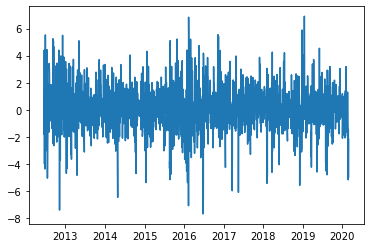

In [129]:
#Plot of the adjusted log returns of BAC data 
plt.plot(in_sample_BAC['BAC_R_Close'])

In [131]:
#Create the naive model 

training_length = len(in_sample_BAC)
naive_model = evaluation_BAC.copy()
naive_model['Naive Forecast'] = in_sample_BAC['BAC_R_Close'][training_length - 1]

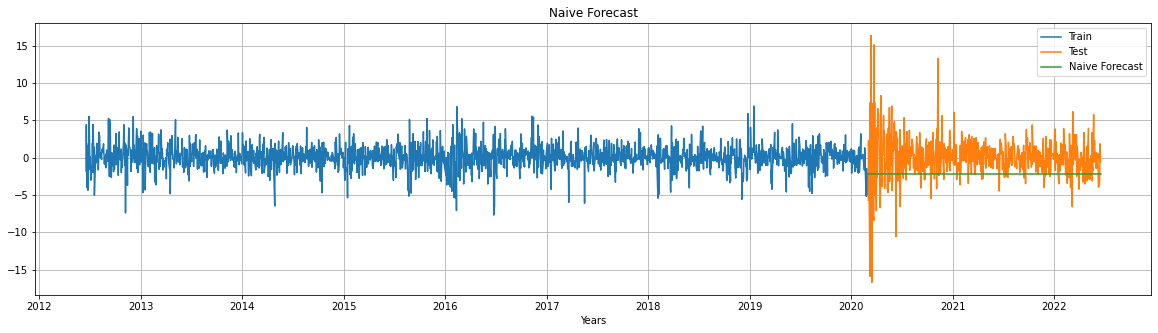

In [134]:
#Plot the model

plt.figure(figsize = (20,5))
plt.grid()
plt.plot(in_sample_BAC['BAC_R_Close'], label = 'Train')
plt.plot(evaluation_BAC['BAC_R_Close'], label = 'Test')
plt.plot(naive_model['Naive Forecast'], label = 'Naive Forecast')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.title('Naive Forecast')
plt.show()

In [135]:
#Calculating the RMSE and RMAE

#RMSE
MSE = mean_squared_error(evaluation_BAC['BAC_R_Close'], naive_model['Naive Forecast'])
RMSFE = math.sqrt(MSE)

#RMAE
MAE = mean_absolute_error(evaluation_BAC['BAC_R_Close'], naive_model['Naive Forecast'])
RMAFE = math.sqrt(MAE)

print("Root Mean Square Forecast Error: " + str(RMSFE))
print("Root Mean Absolute Forecast Error: " + str(RMAFE))

Root Mean Square Forecast Error: 3.5485295653049787
Root Mean Absolute Forecast Error: 1.6664813442896702


Building an Reg-AR(1) Model from BAC data

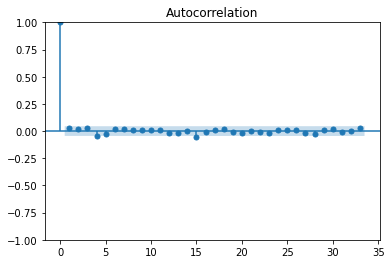

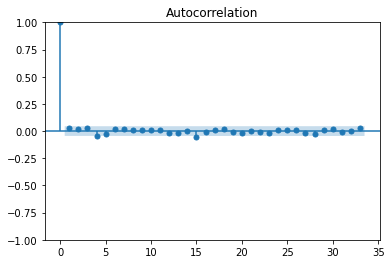

In [136]:
#Plot the ACF of the data 

plot_acf(in_sample_BAC['BAC_R_Close'])

#Can see a clear spike at lag 1, which indicates a AR(1) model 
#Since there is only 1 significant spike and not more than 5% of the spikes are outside the 
#critical value area, we can conclude that the data is stationary

In [137]:
#Check to make sure with the ADF test 

adf_test = adfuller(in_sample_BAC['BAC_R_Close'].dropna())
print('p-value: ' , adf_test[1])

#Since the ADF level is below the 5% (0.05) level, we can conclude that the data is stationary
#and no differecning is required

p-value:  0.0


In [188]:
ar1 = ARIMA(in_sample_BAC['BAC_R_Close'], order = (1,0,0))
model = ar1.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:            BAC_R_Close   No. Observations:                 1937
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3681.537
Date:                Mon, 08 Aug 2022   AIC                           7369.074
Time:                        16:15:08   BIC                           7385.781
Sample:                             0   HQIC                          7375.218
                               - 1937                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0712      0.039      1.846      0.065      -0.004       0.147
ar.L1          0.0318      0.017      1.824      0.068      -0.002       0.066
sigma2         2.6206      0.058     45.362      0.0

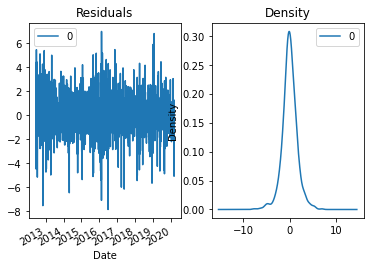

In [189]:
#Get the residual errors 

residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

Building a CAPM Model to forecast 

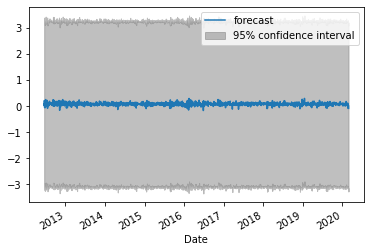

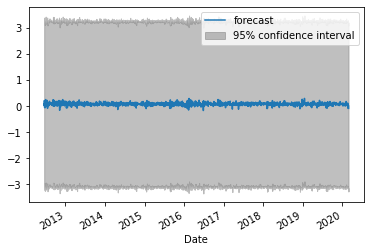

In [190]:
#difference = len(BAC) - len(in_sample_BAC)
plot_predict(model, dynamic = False)

In [195]:
fc, se = model.forecast(119, alpha=0.05)  # 95% conf

ValueError: too many values to unpack (expected 2)

In [119]:
evaluation_BAC.tail()

,Adj Close,BAC_R_Close
Date,,
2022-06-13,32.020000,-3.528508
2022-06-14,31.459999,-1.764385
2022-06-15,32.049999,1.858029
2022-06-16,31.850000,-0.625977
2022-06-17,31.920000,0.219538


# Question 1B

In [165]:
#GARCH(1,1)

model_1 = arch_model(in_sample_BAC['BAC_R_Close'], mean = 'Constant', vol = 'GARCH', p = 1, q = 1)
garch11 = model_1.fit()
garch11

Iteration:      1,   Func. Count:      6,   Neg. LLF: 10710.66183382761
Iteration:      2,   Func. Count:     14,   Neg. LLF: 18127304701.02902
Iteration:      3,   Func. Count:     22,   Neg. LLF: 3720.6758822628303
Iteration:      4,   Func. Count:     28,   Neg. LLF: 3695.933835212267
Iteration:      5,   Func. Count:     34,   Neg. LLF: 3827.2257026301845
Iteration:      6,   Func. Count:     42,   Neg. LLF: 3613.0290517577378
Iteration:      7,   Func. Count:     47,   Neg. LLF: 3613.028286732036
Iteration:      8,   Func. Count:     52,   Neg. LLF: 3613.028285468107
Iteration:      9,   Func. Count:     56,   Neg. LLF: 3613.028285467963
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3613.028285468107
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


                     Constant Mean - GARCH Model Results                      
Dep. Variable:            BAC_R_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3613.03
Distribution:                  Normal   AIC:                           7234.06
Method:            Maximum Likelihood   BIC:                           7256.33
                                        No. Observations:                 1937
Date:                Mon, Aug 08 2022   Df Residuals:                     1936
Time:                        14:26:54   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0987  3.358e-02      2.939  3.291e-03 [3.288e-0

<AxesSubplot:xlabel='Date'>

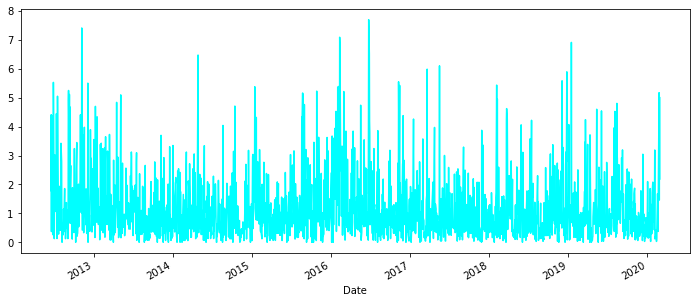

In [198]:
#plotting conditional voliity 

tmp = np.abs(in_sample_BAC['BAC_R_Close']).iloc[0:]

con_vol = garch_model.conditional_volatility

#plot curve 

tmp.plot(figsize = (12,5), color = 'aqua', label = 'BAC_R_Close')


In [164]:
#GJR-GARCH(1,1)

model_2 = arch_model(in_sample_BAC['BAC_R_Close'], p = 1, o = 1, q = 1, vol = 'GARCH')
gjr_garch11 = model_2.fit()
print(gjr_garch11.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6727.306881266679
Iteration:      2,   Func. Count:     17,   Neg. LLF: 211838954.49925584
Iteration:      3,   Func. Count:     26,   Neg. LLF: 4251.348265560064
Iteration:      4,   Func. Count:     35,   Neg. LLF: 3672.8291866717627
Iteration:      5,   Func. Count:     42,   Neg. LLF: 3609.3366028580813
Iteration:      6,   Func. Count:     49,   Neg. LLF: 3601.257868954633
Iteration:      7,   Func. Count:     56,   Neg. LLF: 3600.087357552832
Iteration:      8,   Func. Count:     63,   Neg. LLF: 3600.0237448389444
Iteration:      9,   Func. Count:     69,   Neg. LLF: 3600.0237409897013
Iteration:     10,   Func. Count:     74,   Neg. LLF: 3600.0237409888796
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3600.0237409897013
            Iterations: 10
            Function evaluations: 74
            Gradient evaluations: 10
                   Constant Mean - GJR-GARCH Model Results      

In [163]:
#EGARCH(1,0) 

model_3 = arch_model(in_sample_BAC['BAC_R_Close'], vol = 'EGARCH', o = 1)
egarch10 = model_3.fit()
egarch10

Iteration:      1,   Func. Count:      7,   Neg. LLF: 15949.770596453434
Iteration:      2,   Func. Count:     17,   Neg. LLF: 14241435866.179842
Iteration:      3,   Func. Count:     27,   Neg. LLF: 15945.515331399623
Iteration:      4,   Func. Count:     37,   Neg. LLF: 1237309918.0336385
Iteration:      5,   Func. Count:     46,   Neg. LLF: 3647.4145220437863
Iteration:      6,   Func. Count:     53,   Neg. LLF: 3598.1980747326743
Iteration:      7,   Func. Count:     59,   Neg. LLF: 3598.0820527219594
Iteration:      8,   Func. Count:     65,   Neg. LLF: 3598.0706856681786
Iteration:      9,   Func. Count:     71,   Neg. LLF: 3598.0697644919005
Iteration:     10,   Func. Count:     77,   Neg. LLF: 3598.0691921267708
Iteration:     11,   Func. Count:     83,   Neg. LLF: 3598.069204614131
Iteration:     12,   Func. Count:     90,   Neg. LLF: 3598.069254388367
Iteration:     13,   Func. Count:     98,   Neg. LLF: 3598.069249669107
Optimization terminated successfully    (Exit mode 0)


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:            BAC_R_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3598.07
Distribution:                  Normal   AIC:                           7206.14
Method:            Maximum Likelihood   BIC:                           7233.98
                                        No. Observations:                 1937
Date:                Mon, Aug 08 2022   Df Residuals:                     1936
Time:                        14:24:52   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0687  1.438e-03     47.759      0.000 [6.

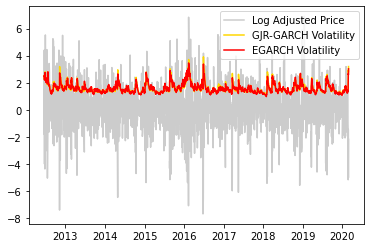

GJR-GARCH BIC: 7237.891960296438

EGARCH BIC: 7233.982837431001


In [170]:
## PROBZ NOT NEEDED!##
#comapre the gjr-garch to egarch

gjrgm_vol = gjr_garch11.conditional_volatility
egarch_vol = egarch10.conditional_volatility

# Plot the actual Bitcoin returns
plt.plot(in_sample_BAC['BAC_R_Close'], color = 'grey', alpha = 0.4, label = 'Log Adjusted Price')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'gold', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

#bic to check 

# Print each models BIC
print(f'GJR-GARCH BIC: {gjr_garch11.bic}')
print(f'\nEGARCH BIC: {egarch10.bic}')

#Egarch has the better model from BIC value

In [184]:
#Forecasts of volitility for 3 models 

am = arch_model(in_sample_BAC['BAC_R_Close'], vol = 'GARCH')

#static
cvar_rjpy_stat = {}
for date in evaluation_BAC['BAC_R_Close'].index:
    res = am.fit(last_obs = '2022-06-17', disp = 'off')
    forecasts = res.forecast(horizon = 1)
    forecasts_res = forecasts.variance.dropna()
    cvar_rjpy_stat[date] = forecasts_res.iloc[0]
    
cvar_rjpy_stat = pd.DataFrame(cvar_rjpy_stat).T

In [185]:
#dynamic
res = am.fit(last_obs = '2022-06-17', disp='off')
forecasts = res.forecast(horizon = len(evaluation_BAC['BAC_R_Close']))
forecasts_res = forecasts.variance.dropna()

cvar_rjpy_dyn = pd.DataFrame(data = forecasts_res.iloc[0].values, columns=['dynamic forecasting'], index=evaluation_BAC['BAC_R_Close'].index)

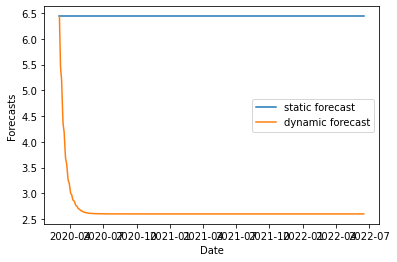

In [186]:
plt.figure(1)
plt.plot(cvar_rjpy_stat, label='static forecast')
plt.plot(cvar_rjpy_dyn, label='dynamic forecast')
plt.xlabel('Date')
plt.ylabel('Forecasts')
plt.legend()
plt.show()

# Question 1C